# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 05/02/2023
* Student Name: Brian Blancato
* Student Net ID: bab3fq
* This URL: https://github.com/BrianBlancato/DS5100_Final_Project/blob/main/montecarlo_demo.ipynb
* GitHub Repo URL: https://github.com/BrianBlancato/DS5100_Final_Project

# The Monte Carlo Module

In [1]:
# A code block with your classes.

# Test Module

In [2]:
# A code block with your test code.

# Test Results

In [3]:
import unittest
from montecarlosimulator import montecarlo_tests

loader = unittest.TestLoader()
suite = loader.loadTestsFromModule(montecarlo_tests)
unittest.TextTestRunner().run(suite)

........
----------------------------------------------------------------------
Ran 8 tests in 0.076s

OK


Welcome to the Monte Carlo Simulator


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

# Scenarios

 

## Scenario 1

In [4]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [5]:
fair_coin = montecarlosimulator.Die(["H", "T"])

sc1_game1 = montecarlosimulator.Game([fair_coin, fair_coin, fair_coin, fair_coin, fair_coin])
sc1_game1.play(1000)

sc1_analyzer1 = montecarlosimulator.Analyzer(sc1_game1)

sc1_freq_1 = sc1_analyzer1.jackpot() / 1000

sc1_freq_1

0.075

In [6]:
unfair_coin = montecarlosimulator.Die(["H", "T"])
unfair_coin.change_weight("H", 5.0)

sc1_game2 = montecarlosimulator.Game([unfair_coin, unfair_coin, fair_coin, fair_coin, fair_coin])
sc1_game2.play(1000)

sc1_analyzer2 = montecarlosimulator.Analyzer(sc1_game2)

sc1_freq_2 = sc1_analyzer2.jackpot() / 1000

sc1_freq_2

0.094

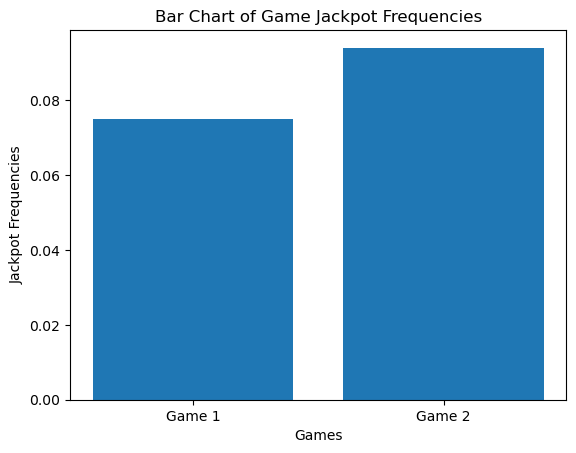

In [7]:
plt.bar(['Game 1', 'Game 2'], [sc1_freq_1, sc1_freq_2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 2

In [8]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [9]:
fair_die = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

sc2_game1 = montecarlosimulator.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
sc2_game1.play(10000)

sc2_analyzer1 = montecarlosimulator.Analyzer(sc2_game1)

sc2_freq1 = sc2_analyzer1.jackpot() / 10000

sc2_freq1

0.0014

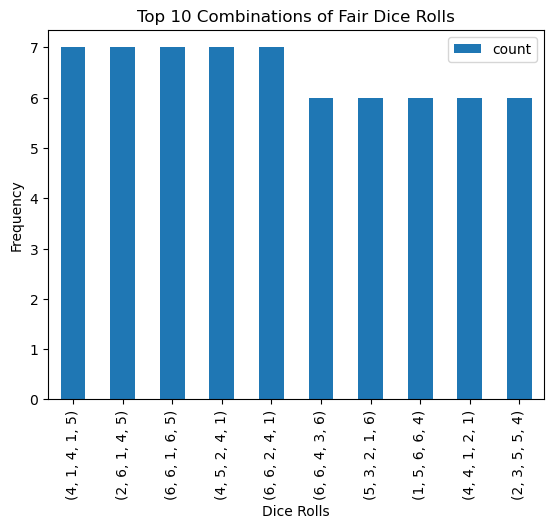

In [10]:
sc2_game1_top_combos = sc2_analyzer1.combo()
sc2_game1_top_10 = sc2_game1_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game1_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Fair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

In [11]:
unfair_die_type1 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])
unfair_die_type2 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

unfair_die_type1.change_weight(6, 5)
unfair_die_type2.change_weight(1, 5)

sc2_game2 = montecarlosimulator.Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
sc2_game2.play(10000)

sc2_analyzer2 = montecarlosimulator.Analyzer(sc2_game2)

sc2_freq2 = sc2_analyzer2.jackpot() / 10000

sc2_freq2

0.0007

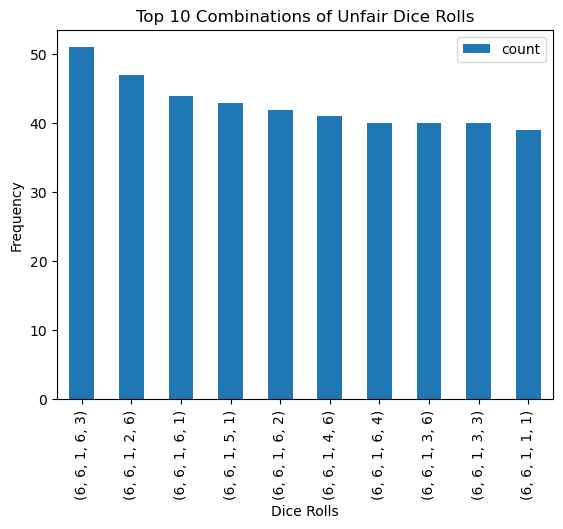

In [12]:
sc2_game2_top_combos = sc2_analyzer2.combo()
sc2_game2_top_10 = sc2_game2_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game2_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Unfair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

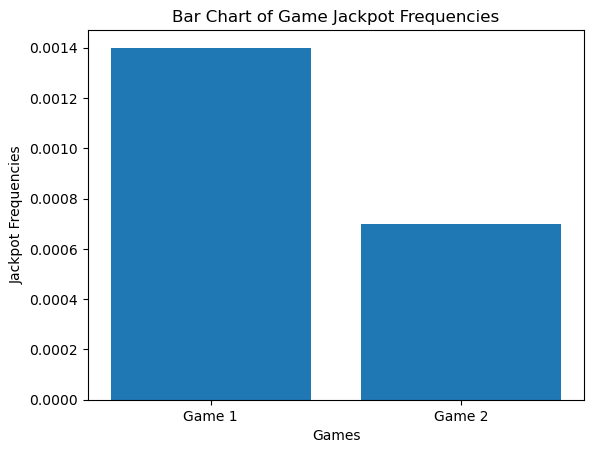

In [13]:
plt.bar(['Game 1', 'Game 2'], [sc2_freq1, sc2_freq2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 3

In [14]:
import pandas as pd
import montecarlosimulator

In [15]:
# create the letter column and frequency column as lists
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequencies = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034,
               7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671,
               0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
               1.7779, 0.2722]

# create the DataFrame
letter_freq_df = pd.DataFrame({'letter': letters, 'frequency': frequencies})

In [16]:
letter_array = letter_freq_df['letter'].values
letter_die = montecarlosimulator.Die(letter_array)

for face in letter_array:
    frequency = letter_freq_df.loc[letter_freq_df['letter'] == face, 'frequency'].values[0]
    letter_die.change_weight(face, frequency)
    
sc3_game = montecarlosimulator.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
sc3_game.play(1000)

sc3_analyzer = montecarlosimulator.Analyzer(sc3_game)

sc3_combos = sc3_analyzer.combo()

In [17]:
pd.set_option('display.max_rows', None)
sc3_combos

count
1 2 3 4 5       
A A A E U      1
    N C A      1
      E S      1
      Z A      1
    O A H      1
    R R B      1
    T R I      1
    Y R R      1
  B T O C      1
  C N E L      1
    S H Y      1
    T I L      1
  D I L T      1
  E E R C      1
      S E      1
    I L R      1
    O E T      1
      V A      1
    P S O      1
    T M E      1
    U U I      1
    Y E E      1
  F C N T      1
  G B T O      1
    D A A      1
    I Z N      1
  H O B U      1
  I C A S      1
    E H A      1
      N R      1
    H S L      1
    I N H      1
    R L H      1
  K H C F      1
  L E O I      1
    I A I      1
    L A E      1
    M N H      1
    P R A      1
    R E R      1
    S E U      1
  M C V P      1
    E R O      1
  N E A W      1
    I U I      1
    K P A      1
    T P V      1
  O A A O      1
    C G W      1
    L D E      1
    O A S      1
    R R R      1
  P F Y F      1
    P U O      1
  R A I J      1
    I A D      1
    L E A      1
    M R A      1
  S A N H      1
    E O O      1
      T R      1
    R R G      1
  T A O I      1
    E F E      1
    I I C      1
    N G I      1
    V E I      1
  U P S D      1
  V B A M      1
    E Y S      1
  W N S R      1
  Y A N U      1
B A C A A      1
    U S H      1
  B L A E      1
  C S A R      1
  D M S G      1
  E I Y S      1
    J V E      1
    N P B      1
  G I V V      1
  H A H E      1
    L T A      1
  I P A L      1
    U A H      1
  M I O R      1
    U A P      1
  N N C N      1
  O P I O      1
  R A E O      1
    N S A      1
  S S N S      1
  U T S S      1
  Y T I E      1
C A B T E      1
    E A M      1
    L O C      1
    P S T      1
  B N E G      1
  C A I Y      1
    E P P      1
    I O E      1
  D A I S      1
    B I T      1
    D B N      1
      T O      1
    R U G      1
  E C E A      1
    P I A      1
      M S      1
    S A G      1
  G K S N      1
    L E I      1
  I A S I      1
    N R T      1
    O O R      1
  J W E O      1
  L B T G      1
    E C N      1
    R R O      1
  M E A N      1
    I E U      1
    O A L      1
  N C E E      1
    H C N      1
    I V E      1
    L L E      1
    S H E      1
    U R A      1
  O C A S      1
      O I      1
    I L T      1
    P R M      1
  R I M Z      1
    P T E      1
    R A I      1
    T O R      1
    W T A      1
  S A U O      1
    K V F      1
    M D S      1
    P B O      1
      D G      1
  T U A E      1
    X A E      1
  U E B F      1
      R T      1
    I N L      1
    N L E      1
    O T D      1
  W N M G      1
  Y E P I      1
    O P T      1
    T C L      1
D A A S U      1
    B T R      1
      W H      1
    D N P      1
    E M H      1
  C L O D      1
    P S N      1
  E B I N      1
    O D I      1
    S N T      1
  F R H R      1
    U I F      1
  H A A S      1
    C C T      1
  I C E N      1
    D Y N      1
    M H G      1
    O O A      1
  L E A U      1
    L E M      1
    R S S      1
  N E I W      1
  O R G S      1
    W U S      1
  P O A I      1
    U R S      1
  R A U T      1
    E I O      1
    G D R      1
    W N E      1
  S A A A      1
    E A F      1
  T E N A      1
  U M G L      1
  Y E A R      1
E A A S A      1
      T R      1
        U      1
    D A P      1
    E K M      1
    I N R      1
    L A D      1
      H H      1
    M I I      1
    N A C      1
        E      1
    P R L      1
    R N A      1
  B S S E      1
    T C I      1
    Y O Y      1
  C A H K      1
    E U I      1
    T A T      1
    Y T V      1
  D A A I      1
    U B W      1
  E C M M      1
    E R D      1
      T R      1
    G N I      1
    I B I      1
      L A      1
      R C      1
      W K      1
    R O E      1
    S N A      1
      P P      1
    T O E      1
    Y K C      1
      T R      1
  F H E C      1
    W S E      1
  H I A A      1
    L A S      1
  I A P P      1
    B O S      1
    M O A      1
    N T O      1
    O A E      1

In [18]:
sc3_combos.to_csv('output.csv')

In [19]:
#I counted 7 amount of english words present in the rolls

english_words = 7

eng_word_freq = english_words / 1000

eng_word_freq

0.007

# Directory Listing



In [20]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 1616-9B9B

 Directory of D:\DS5100\DS5100_Final_Project

05/01/2023  08:21 PM    <DIR>          .
05/01/2023  08:21 PM    <DIR>          ..
04/27/2023  08:20 PM             3,238 .gitignore
04/30/2023  05:31 PM    <DIR>          .ipynb_checkpoints
04/27/2023  08:20 PM             1,091 LICENSE
04/30/2023  11:10 AM    <DIR>          montecarlosimulator
04/30/2023  10:53 PM    <DIR>          montecarlosimulator.egg-info
05/01/2023  08:21 PM           328,803 montecarlo_demo.ipynb
05/01/2023  08:21 PM            13,004 output.csv
04/30/2023  05:31 PM            35,787 project_scrapwork.ipynb
04/27/2023  08:20 PM                22 README.md
04/28/2023  11:30 PM               334 setup.py
               7 File(s)        382,279 bytes
               5 Dir(s)  1,386,126,098,432 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [21]:
!pip install -e D:\DS5100_Final_Project\DS5100_Final_Project

ERROR: D:\DS5100_Final_Project\DS5100_Final_Project is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).
